# Target Object Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageColor, ImageDraw
from scipy import stats
from sklearn.linear_model import LinearRegression


In [2]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [3]:
targetObj = {}
for stim in os.listdir(stimuli_path):
    if 'resize' in stim:
        p = stimuli_path + '/' + stim + '/data.json'
        data = json.load(open(p))
        target_object = data['objects'][0]['name']
        dbID = data['objects'][0]['dbID']
        kp = kinect192_path + '/' + stim[:-2] + '/annotation2Dfinal'
        for file in os.listdir(kp):
            if 'objSA' in file:
                objSA = json.load(open(kp + '/' + file))
#                 print(stim)
                try:
                    target_object_size = objSA[target_object + '_' + str(dbID)]
                    targetObj[stim] = [target_object, target_object_size]
                except:
                    try:
                        target_object_size = objSA[target_object.capitalize()  + '_' + str(dbID)]
                        targetObj[stim] = [target_object, target_object_size]
                    except:
                        print(stim, target_object + '_' + str(dbID))
                        print('FAILED')
#                 print(target_object)
#                 print(target_object_size)

001148_2014-06-17_15-26-42_260595134347_rgbf000129-resize_0 wall_1
FAILED
001136_2014-06-17_15-19-41_260595134347_rgbf000076-resize_3 books_26
FAILED
001016_2014-06-09_16-16-10_260595134347_rgbf000112-resize_5 shoulderbag_7
FAILED
000493_2014-06-09_21-01-18_260595134347_rgbf000196-resize_3 wallseat_4
FAILED
001094_2014-06-15_17-36-00_260595134347_rgbf000205-resize_0 wall_13
FAILED


In [4]:
cleaned_targetObj = {'000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize_1': ['wall',
  4.73195337315781],
 '002987_2014-06-08_18-48-20_094959634447_rgbf000022-resize_0': ['basket',
  1.0790082945794868],
 '003070_2014-06-15_14-58-27_094959634447_rgbf000150-resize_3': ['couch',
  12.525427555277139],
 '001092_2014-06-15_17-34-58_260595134347_rgbf000171-resize_3': ['bed',
  7.742104437696458],
 '002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2': ['tag',
  0.3204326682751225],
 '002700_2014-06-22_11-27-02_094959634447_rgbf000124-resize_3': ['chair',
  1.1362873262162125],
 '000642_2014-06-08_16-59-25_260595134347_rgbf000098-resize_2': ['coffeetable',
  2.6687058737760907],
 '002549_2014-06-24_13-41-39_094959634447_rgbf000022-resize_3': ['table',
  3.854259770062799],
 '000505_2014-06-08_23-03-23_260595134347_rgbf000091-resize_0': ['floor',
  71.84473526412562],
 '001815_2014-06-26_20-52-55_260595134347_rgbf000020-resize_0': ['wall',
  15.81182904558947],
 '000549_2014-06-08_22-10-24_260595134347_rgbf000247-resize_3': ['chair',
  11.987183943781053],
 '000506_2014-06-08_23-21-00_260595134347_rgbf000070-resize_7': ['files',
  0.13701809430565468],
 '002725_2014-06-22_11-47-51_094959634447_rgbf000070-resize_1': ['wall',
  0.014206540806181946],
 '000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9': ['shelf',
  0.8861653348030477],
 '000810_2014-06-08_17-20-01_260595134347_rgbf000105-resize_0': ['toilet',
  18.060399961240826],
 '000502_2014-06-08_23-02-32_260595134347_rgbf000063-resize_4': ['trashcan',
  1.7269743937824054],
 '000469_2014-06-09_19-42-10_260595134347_rgbf000081-resize_1': ['chair',
  1.7280863367359618],
 '000635_2014-06-08_16-38-42_260595134347_rgbf000106-resize_1': ['wall',
  13.036238046917523],
 '001650_2014-06-20_12-09-00_260595134347_rgbf000087-resize_3': ['table',
  10.205634281700288],
 '000929_2014-06-09_16-33-19_260595134347_rgbf000139-resize_0': ['table',
  3.6506305585196106],
 '001392_2014-06-19_16-07-59_260595134347_rgbf000046-resize_1': ['wall',
  6.219102131338553],
 '000665_2014-06-09_20-42-35_260595134347_rgbf000110-resize_1': ['woodencupboard',
  10.51000729496111],
 '000436_2014-06-09_22-25-11_260595134347_rgbf000137-resize_1': ['curtain',
  7.345569586182103],
 '001148_2014-06-17_15-26-42_260595134347_rgbf000129-resize_0': ['wall',
  7.472741689382981],
 '000742_2014-06-08_18-48-09_260595134347_rgbf000164-resize_4': ['locker',
  1.198313107278707],
 '001029_2014-06-08_13-17-57_260595134347_rgbf000065-resize_1': ['cubiclewall',
  1.9048163203091497],
 '000137_2014-05-20_17-04-49_260595134347_rgbf000120-resize_1': ['bookcase',
  4.766355018382033],
 '002784_2014-06-22_19-26-30_094959634447_rgbf000083-resize_3': ['pipes',
  1.4977387774568987],
 '000709_2014-06-08_13-51-55_260595134347_rgbf000068-resize_3': ['stapler',
  0.06717933615630425],
 '002136_2014-06-25_21-18-03_260595134347_rgbf000109-resize_3': ['bed',
  3.681487432772059],
 '002340_2014-06-28_20-05-46_260595134347_rgbf000113-resize_0': ['wall',
  7.194145140756353],
 '000457_2014-06-08_16-52-43_260595134347_rgbf000199-resize_1': ['window',
  63.39455568728609],
 '001136_2014-06-17_15-19-41_260595134347_rgbf000076-resize_3': ['books',
  0.7627501923359205],
 '000191_2014-05-12_17-07-38_260595134347_rgbf000199-resize_0': ['wall',
  15.400950188171798],
 '000368_2014-06-09_15-53-01_260595134347_rgbf000155-resize_2': ['chair',
  3.819926373194075],
 '001150_2014-06-17_15-27-34_260595134347_rgbf000108-resize_2': ['racks',
  3.5267308702115154],
 '002199_2014-06-28_18-33-56_260595134347_rgbf000074-resize_0': ['bed',
  17.69408835922931],
 '002637_2014-06-24_14-51-13_094959634447_rgbf000066-resize_4': ['computer',
  5.285246910947429],
 '002905_2014-06-03_18-04-43_094959634447_rgbf000151-resize_2': ['couch',
  6.179684968660078],
 '003288_2014-05-14_21-50-30_094959634447_rgbf000028-resize_3': ['chair',
  0.06565453408768632],
 '002209_2014-06-28_18-36-10_260595134347_rgbf000051-resize_1': ['bed',
  5.179847913258357],
 '003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize_2': ['chair',
  1.8839727871313807],
 '001449_2014-06-19_17-01-27_260595134347_rgbf000116-resize_2': ['table',
  8.974724263153815],
 '003546_2014-05-22_15-48-53_094959634447_rgbf004816-resize_3': ['table',
  5.203528375080771],
 '001164_2014-06-17_15-35-46_260595134347_rgbf000085-resize_3': ['shelf',
  0.8222390535510297],
 '001110_2014-06-15_17-25-28_260595134347_rgbf000150-resize_1': ['piano',
  7.77149102901482],
 '000830_2014-06-04_19-49-31_260595134347_rgbf000096-resize_2': ['chair',
  3.5866106204680452],
 '003010_2014-06-15_12-54-35_094959634447_rgbf000112-resize_0': ['wall',
  0.09545162892607545],
 '002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1': ['table',
  5.196876545425555],
 '002153_2014-06-25_21-27-18_260595134347_rgbf000038-resize_5': ['table',
  5.487371527034909],
 '001032_2014-06-08_13-23-17_260595134347_rgbf000021-resize_3': ['paper',
  0.08971043007292454],
 '002663_2014-06-13_15-50-26_094959634447_rgbf000075-resize_1': ['wall',
  12.704526657083164],
 '001133_2014-06-17_14-49-16_260595134347_rgbf000100-resize_0': ['couch',
  13.552295606193288],
 '001158_2014-06-17_15-32-16_260595134347_rgbf000138-resize_2': ['chair',
  0.32806826649609444],
 '000854_2014-06-09_19-43-13_260595134347_rgbf000066-resize_0': ['bench',
  8.789325324625993],
 '002103_2014-06-25_20-00-40_260595134347_rgbf000049-resize_0': ['wall',
  19.65585518376908],
 '001570_2014-06-20_17-21-09_260595134347_rgbf000135-resize_4': ['window',
  3.398403090071746],
 '000522_2014-06-08_13-35-06_260595134347_rgbf000244-resize_1': ['floor',
  38.429875437247325],
 '002213_2014-06-28_18-37-58_260595134347_rgbf000055-resize_1': ['wall',
  5.316064801466737],
 '001617_2014-06-20_11-35-32_260595134347_rgbf000066-resize_1': ['wall',
  9.625298912703645],
 '002365_2014-06-28_20-11-21_260595134347_rgbf000102-resize_1': ['wall',
  5.55134323323952],
 '003495_2014-05-21_16-01-51_094959634447_rgbf000100-resize_3': ['chair',
  1.0575844363592648],
 '001806_2014-06-26_20-50-20_260595134347_rgbf000091-resize_1': ['bed',
  12.19929384701464],
 '002444_2014-06-28_20-32-08_260595134347_rgbf000027-resize_0': ['shelf',
  8.09318533794376],
 '003423_2014-05-21_10-23-26_094959634447_rgbf002665-resize_2': ['classroom',
  79.60339747198284],
 '003534_2014-05-22_15-06-10_094959634447_rgbf000102-resize_4': ['desk',
  6.5229313471514265],
 '001244_2014-06-17_16-47-45_260595134347_rgbf000030-resize_4': ['wood',
  0.6037009406621534],
 '001197_2014-06-17_16-01-50_260595134347_rgbf000103-resize_4': ['counter',
  3.504416837028545],
 '000917_2014-06-09_22-45-29_260595134347_rgbf000149-resize_3': ['toaster',
  0.8414203762187884],
 '002989_2014-06-15_12-25-03_094959634447_rgbf000150-resize_3': ['box',
  0.14749361553089035],
 '001100_2014-06-15_17-46-26_260595134347_rgbf000225-resize_2': ['bed',
  12.801543017880073],
 '000521_2014-06-08_13-34-35_260595134347_rgbf000191-resize_2': ['table',
  3.722915803704359],
 '000556_2014-06-09_22-42-56_260595134347_rgbf000214-resize_1': ['sofas',
  12.910136666914786],
 '003069_2014-06-15_14-57-50_094959634447_rgbf000150-resize_4': ['baner',
  4.861298048124029],
 '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2': ['sink',
  1.4339254164710502],
 '002630_2014-06-24_14-47-50_094959634447_rgbf000055-resize_1': ['wall',
  10.775773678972143],
 '003083_2014-06-15_15-21-03_094959634447_rgbf000063-resize_1': ['wall',
  2.5647952119129855],
 '000927_2014-06-09_16-32-30_260595134347_rgbf000123-resize_3': ['wall',
  0.5096374562640771],
 '002057_2014-06-24_21-00-13_260595134347_rgbf000120-resize_1': ['headboard',
  4.823475611519976],
 '003621_2014-05-23_18-06-08_094959634447_rgbf000101-resize_1': ['wall',
  14.784310014131261],
 '002323_2014-06-28_20-01-54_260595134347_rgbf000051-resize_4': ['pillow',
  0.096237592755378],
 '003081_2014-06-15_15-19-16_094959634447_rgbf000150-resize_1': ['countertop',
  3.445167493134318],
 '001056_2014-06-08_18-46-44_260595134347_rgbf000068-resize_0': ['chair',
  3.0003758596223813],
 '001181_2014-06-17_15-50-57_260595134347_rgbf000106-resize_4': ['wall',
  21.2463567009966],
 '001055_2014-06-08_18-45-35_260595134347_rgbf000111-resize_4': ['cloth',
  0.22038808954131725],
 '000740_2014-06-08_18-46-23_260595134347_rgbf000049-resize_6': ['paper',
  0.15719462689417713],
 '000555_2014-06-09_22-42-23_260595134347_rgbf000037-resize_4': ['table',
  1.1605194828510674],
 '002790_2014-06-22_19-36-35_094959634447_rgbf000074-resize_4': ['table',
  3.872525400965562],
 '003048_2014-06-15_13-49-43_094959634447_rgbf000150-resize_1': ['wallhanging',
  0.40099996224877194],
 '001132_2014-06-17_14-48-54_260595134347_rgbf000100-resize_2': ['chair',
  1.2517590374988625],
 '000493_2014-06-09_21-01-18_260595134347_rgbf000196-resize_3': ['bench',
  11.5352580043136],
 '002964_2014-06-08_17-46-11_094959634447_rgbf000091-resize_4': ['paper',
  0.10275632948344741],
 '000736_2014-06-08_18-24-15_260595134347_rgbf000206-resize_3': ['table',
  7.119928307088899],
 '001828_2014-06-26_21-40-03_260595134347_rgbf000024-resize_0': ['wall',
  5.2992837924000815],
 '000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4': ['chair',
  1.9718364242797513],
 '002043_2014-06-24_20-29-38_260595134347_rgbf000039-resize_4': ['pillow',
  0.5457090793370475],
 '000542_2014-06-08_18-27-08_260595134347_rgbf000118-resize_1': ['table',
  5.633732278696621],
 '001052_2014-06-08_18-24-54_260595134347_rgbf000130-resize_1': ['photoframe',
  2.576471824357865],
 '000780_2014-06-08_22-28-29_260595134347_rgbf000126-resize_1': ['whiteboard',
  8.259251527950848],
 '000773_2014-06-08_22-24-54_260595134347_rgbf000093-resize_1': ['chairs',
  11.402622655735],
 '003228_2014-05-14_13-42-35_094959634447_rgbf000101-resize_1': ['desk',
  3.8147667872526605],
 '000800_2014-06-08_22-42-09_260595134347_rgbf000095-resize_3': ['wall',
  0.454949893783583],
 '003490_2014-05-21_15-50-11_094959634447_rgbf000101-resize_3': ['chair',
  0.9470093008914993],
 '002414_2014-06-28_20-24-58_260595134347_rgbf000067-resize_4': ['pillow',
  1.316830863134362],
 '002568_2014-06-24_13-59-21_094959634447_rgbf000062-resize_4': ['flyers',
  1.8599078728919147],
 '002425_2014-06-28_20-27-29_260595134347_rgbf000031-resize_8': ['lamp',
  0.05172420738241024],
 '002600_2014-06-24_14-27-04_094959634447_rgbf000074-resize_2': ['couch',
  3.4392703421146464],
 '001235_2014-06-17_16-37-36_260595134347_rgbf000084-resize_4': ['books',
  0.13479368478235415],
 '002131_2014-06-25_21-12-01_260595134347_rgbf000083-resize_0': ['television',
  1.2882105148294094],
 '001618_2014-06-20_11-37-31_260595134347_rgbf000027-resize_3': ['table',
  8.25573032713853],
 '000788_2014-06-08_22-34-36_260595134347_rgbf000131-resize_1': ['table',
  19.45917426162218],
 '000409_2014-06-04_19-23-33_260595134347_rgbf000067-resize_0': ['table',
  1.8548867210167503],
 '000677_2014-06-08_23-10-32_260595134347_rgbf000158-resize_6': ['computer',
  1.6475522376202176],
 '000735_2014-06-08_18-23-50_260595134347_rgbf000163-resize_2': ['chair',
  1.351686435011568],
 '002545_2014-06-24_13-38-53_094959634447_rgbf000080-resize_4': ['countertop',
  5.297652309850001],
 '000753_2014-06-08_21-57-44_260595134347_rgbf000123-resize_3': ['chair',
  2.1263445244284176],
 '001289_2014-06-16_16-25-52_260595134347_rgbf000067-resize_1': ['sofa',
  5.334419400440041],
 '001584_2014-06-20_11-07-43_260595134347_rgbf000002-resize_1': ['wall',
  10.220628084642218],
 '002750_2014-06-22_19-08-03_094959634447_rgbf000094-resize_4': ['microwave',
  0.9397948015785372],
 '002805_2014-06-22_19-54-03_094959634447_rgbf000079-resize_1': ['pot',
  0.20105301148905835],
 '000691_2014-06-08_13-08-50_260595134347_rgbf000132-resize_3': ['filingcabinet',
  5.570090033300133],
 '000906_2014-06-08_13-35-43_260595134347_rgbf000155-resize_1': ['wall',
  21.926956523643597],
 '001532_2014-06-20_16-50-41_260595134347_rgbf000081-resize_4': ['chair',
  1.5702176338083726],
 '002763_2014-06-22_19-13-10_094959634447_rgbf000075-resize_4': ['wire',
  0.08777551691770026],
 '001214_2014-06-17_16-13-55_260595134347_rgbf000111-resize_0': ['trashcan',
  0.19517971287011263],
 '002758_2014-06-22_19-11-20_094959634447_rgbf000128-resize_1': ['box',
  1.8014481247085223],
 '002639_2014-06-24_14-51-37_094959634447_rgbf000074-resize_4': ['table',
  0.91272020911734],
 '000869_2014-06-09_20-50-18_260595134347_rgbf000060-resize_3': ['table',
  1.5690376859035817],
 '003079_2014-06-15_15-18-20_094959634447_rgbf000152-resize_8': ['rangehood',
  1.9822955466059415],
 '000414_2014-06-04_19-49-13_260595134347_rgbf000044-resize_0': ['headboard',
  4.413526149010241],
 '002995_2014-06-15_12-31-26_094959634447_rgbf000150-resize_1': ['window',
  7.034507840851809],
 '000447_2014-06-08_16-15-46_260595134347_rgbf000130-resize_1': ['wall',
  33.38147108959663],
 '001094_2014-06-15_17-36-00_260595134347_rgbf000205-resize_0': ['wall',
  10.777617009386525],
 '001808_2014-06-26_20-50-58_260595134347_rgbf000029-resize_1': ['wall',
  28.320217925936486],
 '000758_2014-06-08_22-05-08_260595134347_rgbf000085-resize_0': ['lockers',
  4.5434399541465895],
 '000878_2014-06-08_22-52-45_260595134347_rgbf000045-resize_2': ['map',
  1.1948402835487335],
 '001167_2014-06-17_15-38-07_260595134347_rgbf000108-resize_0': ['tablelegs',
  0.9136987000319405],
 '002139_2014-06-25_21-19-37_260595134347_rgbf000124-resize_2': ['mirror',
  9.723368781255127],
 '000636_2014-06-08_16-39-02_260595134347_rgbf000108-resize_4': ['divider',
  0.965689079302214]}

In [5]:
## isolate images where the target object is bed 
bed_count = 0
for key in cleaned_targetObj:
    if cleaned_targetObj[key][0] == 'bed':
        bed_count += 1
print(bed_count)        

6


In [6]:
targetobjects = []
targetobjectssize = []
for key in cleaned_targetObj:
    targetobjects.append(cleaned_targetObj[key][0])
    targetobjectssize.append(cleaned_targetObj[key][1])



In [7]:
for key in cleaned_targetObj:
    print(cleaned_targetObj[key][0], ':', cleaned_targetObj[key][1])

wall : 4.73195337315781
basket : 1.0790082945794868
couch : 12.525427555277139
bed : 7.742104437696458
tag : 0.3204326682751225
chair : 1.1362873262162125
coffeetable : 2.6687058737760907
table : 3.854259770062799
floor : 71.84473526412562
wall : 15.81182904558947
chair : 11.987183943781053
files : 0.13701809430565468
wall : 0.014206540806181946
shelf : 0.8861653348030477
toilet : 18.060399961240826
trashcan : 1.7269743937824054
chair : 1.7280863367359618
wall : 13.036238046917523
table : 10.205634281700288
table : 3.6506305585196106
wall : 6.219102131338553
woodencupboard : 10.51000729496111
curtain : 7.345569586182103
wall : 7.472741689382981
locker : 1.198313107278707
cubiclewall : 1.9048163203091497
bookcase : 4.766355018382033
pipes : 1.4977387774568987
stapler : 0.06717933615630425
bed : 3.681487432772059
wall : 7.194145140756353
window : 63.39455568728609
books : 0.7627501923359205
wall : 15.400950188171798
chair : 3.819926373194075
racks : 3.5267308702115154
bed : 17.6940883592

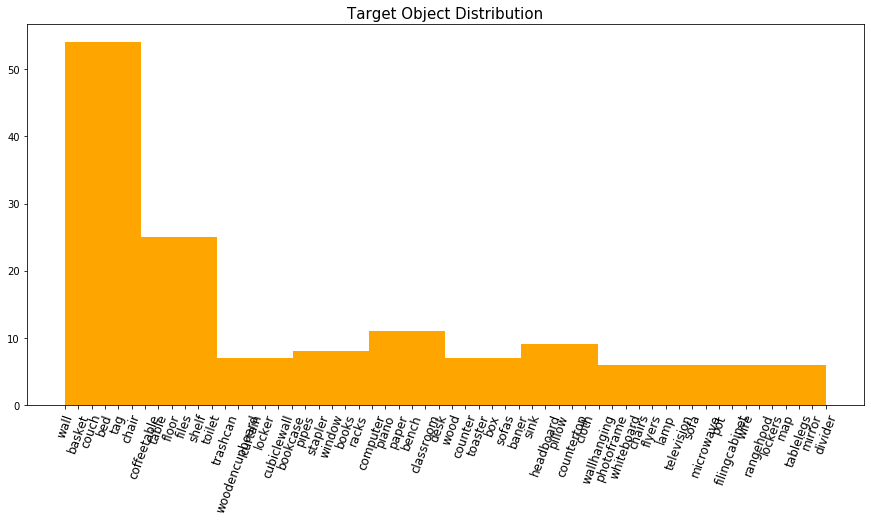

In [8]:
plt.figure(figsize=[15,7])
plt.hist(targetobjects, color='orange')
plt.xticks(rotation=70, fontsize=12)
plt.title('Target Object Distribution', fontsize=15)
plt.show();

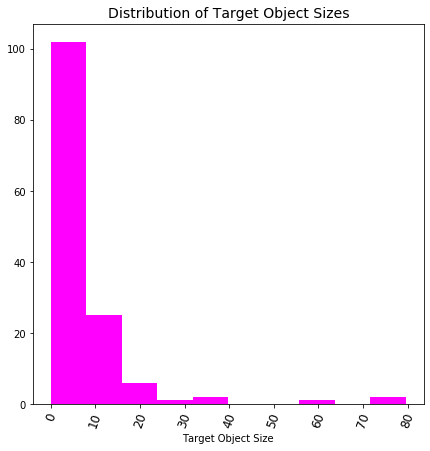

In [9]:
plt.figure(figsize=[7,7])
plt.hist(targetobjectssize, color='magenta')
plt.xticks(rotation=70, fontsize=12)
plt.title('Distribution of Target Object Sizes', fontsize=14)
plt.xlabel('Target Object Size')
plt.show();

In [10]:
# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path  = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# stim 
with open(TAC_raw_individual_trial_data_path + 'final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy' , 'rb') as f:
    stim_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy' , 'rb') as f:
    stim_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)

# x data
with open(TAC_raw_individual_trial_data_path + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
    X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
    X_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(TAC_raw_individual_trial_data_path + 'final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
    y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
    y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)

In [11]:
# TAC_raw_individual_trial_residuals_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

TAC_raw_individual_trial_residuals_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

# residuals
with open(TAC_raw_individual_trial_residuals_path + 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_500.npy' , 'rb') as f:
    residuals_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_residuals_path + 'residuals_750.npy' , 'rb') as f:
    residuals_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_1000.npy' , 'rb') as f:
    residuals_1000 = np.load(f, allow_pickle=True)

In [12]:
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_500 = [elem.split('/')[1][:-2] for elem in stim_500]
stimfolder_750 = [elem.split('/')[1][:-2] for elem in stim_750]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


## Are people biased by the overall position of the obejct?

Calculate the mean depth of the whole target object

In [13]:
stim_250[0].split('/')[1][-1]

'2'

In [14]:
stim_250[0], stimfolder_250[0], len(stim_250)

('depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-target.png',
 '002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize',
 192)

In [15]:
targetobj_meandepth = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    depthbfx_path = kinect192_path + '/' + folder + '/depth_bfx'
    for file in os.listdir(depthbfx_path):
        if "png" in file:
            im = Image.open(depthbfx_path + '/' + file)
            im.load()
            depthdata = np.asarray(im)/8000
    for file in os.listdir(kinect192_path + '/' + folder + '/annotation2Dfinal'):
        if 'objSeg' in file:
            # JSON file
            f = open (kinect192_path + '/' + folder + '/annotation2Dfinal/' + file, "r")
            # Reading from file
            data = json.loads(f.read())
            # coordinates are in PIL system
            # need to be rotated when indexing for depth
            coords = data[str(targetobj_num)]['pixels']
            depths = []
            for coord in coords:
                i0 = coord[1]
                i1 = coord[0]
                depth = depthdata[int(i0)][int(i1)]
                depths.append(depth)
    if len(depths) < 2:
        p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" +targetobj_num
        for file in os.listdir():
            # JSON file
            f = open (p + '/data.json', "r")
            # Reading from file
            data = json.loads(f.read())
            depthval = data['objects'][0]['crossing_point'][0]['depth']
        targetobj_meandepth.append(depthval)
        
    else: targetobj_meandepth.append(np.mean(np.array(depths)))
            
                


In [16]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" +targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

192

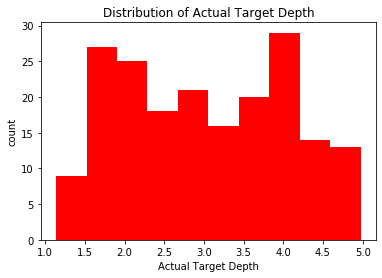

3.0211898871527776


In [30]:
plt.title('Distribution of Actual Target Depth')
plt.xlabel('Actual Target Depth')
plt.ylabel('count')
plt.hist(actual_depth_values, color='red')
plt.show()
print(np.mean(np.array(actual_depth_values)))

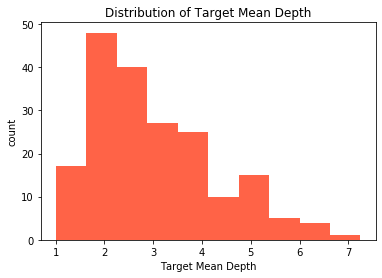

3.0081356118243128


In [31]:
plt.title('Distribution of Target Mean Depth')
plt.xlabel('Target Mean Depth')
plt.ylabel('count')
plt.hist(targetobj_meandepth, color='tomato')
plt.show()
print(np.mean(np.array(targetobj_meandepth)))

m: [0.26369281]
b: 2.2279661639818737
R-squared:  0.10442132769188894


0.104

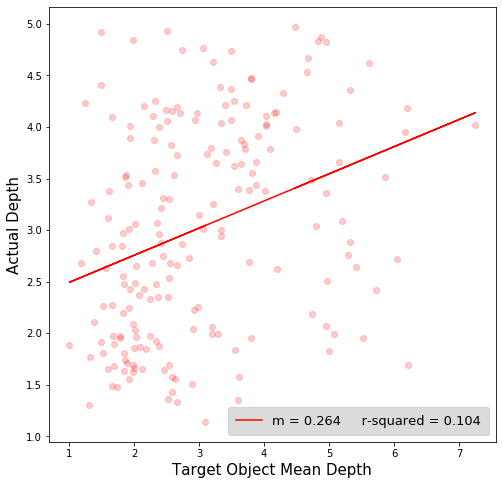

In [38]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(targetobj_meandepth).reshape(-1,1)
y = np.abs(actual_depth_values)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='red', alpha = 0.2, marker = 'o');
plt.plot(X,y_predicted,color='red', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
# plt.title("250 ms", fontsize = 20)
plt.xlabel("Target Object Mean Depth", fontsize = 15)
plt.ylabel("Actual Depth", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

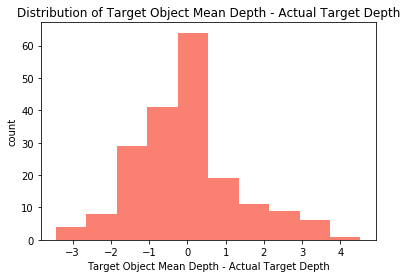

In [32]:
# Target Object Mean Depth - Actual Target Depth
md_ac = np.array(targetobj_meandepth) - np.array(actual_depth_values)

plt.title('Distribution of Target Object Mean Depth - Actual Target Depth')
plt.xlabel('Target Object Mean Depth - Actual Target Depth')
plt.ylabel('count')
plt.hist(md_ac, color='salmon')
plt.show()

m: [0.73630719]
b: -2.2279661639818755
R-squared:  0.4761902885863377


0.476

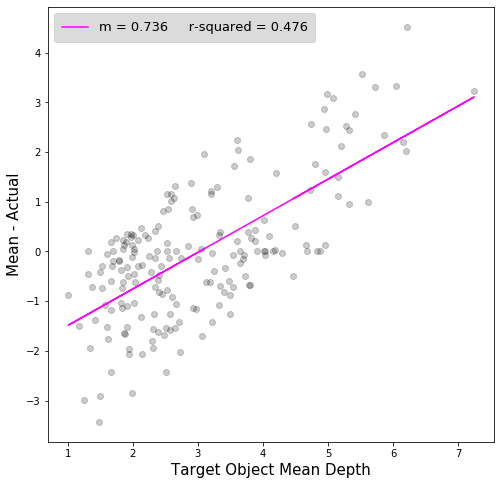

In [51]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(targetobj_meandepth).reshape(-1,1)
y = md_ac
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.2, marker = 'o');
plt.plot(X,y_predicted,color='magenta', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
# plt.title("250 ms", fontsize = 20)
plt.xlabel("Target Object Mean Depth", fontsize = 15)
plt.ylabel("Mean - Actual", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [18]:
len(targetobj_meandepth), len(residuals_250)

(192, 192)

In [50]:
stats.pearsonr(targetobj_meandepth, np.array(targetobj_meandepth) - np.array(actual_depth_values))

(0.6900654234102284, 1.746363062990423e-28)

In [59]:
# corr, p-value
print('Correlation between Linear Model Residuals and Target Object Mean Depth')
print('250 ms: ',stats.pearsonr(residuals_250, targetobj_meandepth))
print('500 ms: ',stats.pearsonr(residuals_500, targetobj_meandepth))
print('750 ms: ',stats.pearsonr(residuals_750, targetobj_meandepth))
print('1000 ms: ',stats.pearsonr(residuals_1000, targetobj_meandepth))


Correlation between Linear Model Residuals and Target Object Mean Depth
250 ms:  (-0.07028031732095581, 0.3327089184522668)
500 ms:  (-0.0869752854700867, 0.23030646945989325)
750 ms:  (-0.03833752107586852, 0.5975371260820118)
1000 ms:  (0.0010754151652400193, 0.9881884785375877)


In [58]:
# corr, p-value
print('Correlation between Linear Model Residuals and Target Object Mean Depth - Actual Depth')
print('250 ms: ',stats.pearsonr(residuals_250, md_ac))
print('500 ms: ',stats.pearsonr(residuals_500, md_ac))
print('750 ms: ',stats.pearsonr(residuals_750, md_ac))
print('1000 ms: ',stats.pearsonr(residuals_1000, md_ac))


Correlation between Linear Model Residuals and Target Object Mean Depth - Actual Depth
250 ms:  (-0.0658665532366412, 0.36403667484055846)
500 ms:  (-0.08151303934109247, 0.2610241526647662)
750 ms:  (-0.03592983738779447, 0.620764448282315)
1000 ms:  (0.0010078766421796718, 0.9889302202001528)


In [94]:
# corr, p-value
print('Correlation between Estimated Depth and Target Object Depth')
print('250 ms: ',stats.pearsonr(y_250, targetobj_meandepth))
print('1000 ms: ',stats.pearsonr(y_1000, targetobj_meandepth))


Correlation between Estimated Depth and Target Object Depth
250 ms:  (0.21300514861095066, 0.0030137641224473747)
1000 ms:  (0.27275322752115205, 0.00012943665001697132)


m: [0.16363792]
b: 1.938186956732081
R-squared:  0.07439432312320537


0.074

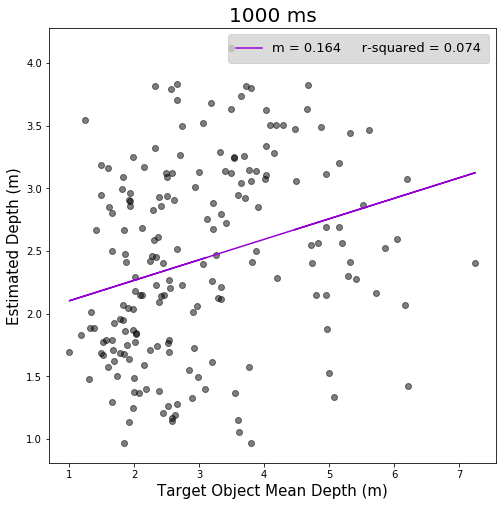

In [96]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(targetobj_meandepth).reshape(-1,1)
y = y_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Target Object Mean Depth (m)", fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.02313407]
b: 0.06959043090022807
R-squared:  0.004939323002734253


0.005

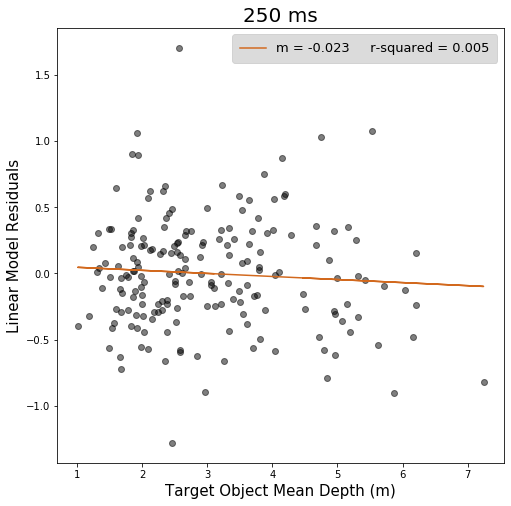

In [97]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(targetobj_meandepth).reshape(-1,1)
y = residuals_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Target Object Mean Depth (m)", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Actual Depth x Behavioral Data

In [99]:
# corr, p-value
print('Correlation between Actual Depth and Target Object Mean Depth')
print(stats.pearsonr(actual_depth_values, targetobj_meandepth))


Correlation between Actual Depth and Target Object Mean Depth
(0.3231428905173204, 4.83988969772455e-06)
